# **1- Concept of random matrix theory on random time series: pdf of correlation, pdf of eigenvalues**

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
from random  import seed
from random import randrange
from scipy import stats
import statsmodels as sm
import matplotlib
import seaborn as sns
import xlrd
import datetime as dt
import matplotlib.pyplot as plt

#import collections
#from collections import counter

In [ ]:
np.random.seed(2019)
N=10
rng=pd.date_range('2022-01-01',freq='MS',periods=N)
df=pd.DataFrame(np.random.rand(N,10), columns=['TS1','TS2','TS3','TS4','TS5','TS6','TS7','TS8','TS9','TS10'])
display(df.shape)
display(df.head(5))

(10, 10)

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10
0,0.903482,0.393081,0.623970,0.637877,0.880499,0.299172,0.702198,0.903206,0.881382,0.405750
1,0.452447,0.267070,0.162865,0.889215,0.148476,0.984723,0.032361,0.515351,0.201129,0.886011
2,0.513620,0.578302,0.299283,0.837197,0.526650,0.104844,0.278129,0.046595,0.509076,0.472426
3,0.904487,0.943492,0.703392,0.846298,0.927995,0.819362,0.845186,0.791452,0.171000,0.289978
4,0.304484,0.147660,0.573819,0.863557,0.323299,0.275649,0.682187,0.191406,0.581024,0.862558


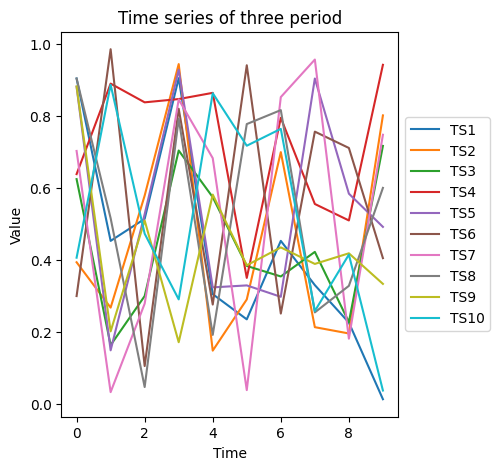

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(df['TS1'], label='TS1')
plt.plot(df['TS2'], label='TS2')
plt.plot(df['TS3'], label='TS3')
plt.plot(df['TS4'], label='TS4')
plt.plot(df['TS5'], label='TS5')
plt.plot(df['TS6'], label='TS6')
plt.plot(df['TS7'], label='TS7')
plt.plot(df['TS8'], label='TS8')
plt.plot(df['TS9'], label='TS9')
plt.plot(df['TS10'], label='TS10')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time series of three period')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplots_adjust(wspace=0.3)

plt.show()


The above plot shows the time series data for the 10 variables (TS1, TS2, ...., TS10) over a period of 10 months, the data is randomly generated using numpy and pandas libraries. The x-axis represents the time period, which starts from January 2022 and ends in October 2022, the y-axis represents the values of the variables.

The plot shows that the values of all variables change over time, there are no clear trends in the data, and the values seem to be randomly distributed around a mean value.

In [ ]:
corr=df.corr()
display(corr)

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10
TS1,1.000000,0.299260,0.229217,0.114155,0.517161,-0.072372,0.239160,0.387108,0.249265,0.020291
TS2,0.299260,1.000000,0.507293,0.510619,0.233309,-0.225488,0.417446,0.421753,-0.311741,-0.461594
TS3,0.229217,0.507293,1.000000,0.279400,0.502285,-0.253589,0.683309,0.360929,0.184671,-0.530797
TS4,0.114155,0.510619,0.279400,1.000000,-0.196656,-0.404393,0.300597,-0.134091,-0.203008,-0.019971
TS5,0.517161,0.233309,0.502285,-0.196656,1.000000,-0.008098,0.553343,0.105197,0.209818,-0.726752
TS6,-0.072372,-0.225488,-0.253589,-0.404393,-0.008098,1.000000,-0.378285,0.217972,-0.642596,0.068753
TS7,0.239160,0.417446,0.683309,0.300597,0.553343,-0.378285,1.000000,0.167082,0.156968,-0.443761
TS8,0.387108,0.421753,0.360929,-0.134091,0.105197,0.217972,0.167082,1.000000,0.021800,-0.030422
TS9,0.249265,-0.311741,0.184671,-0.203008,0.209818,-0.642596,0.156968,0.021800,1.000000,0.045250
TS10,0.020291,-0.461594,-0.530797,-0.019971,-0.726752,0.068753,-0.443761,-0.030422,0.045250,1.000000


The square matrix with the same number of rows and columns as the dataframe df,values in the matrix represent the correlation coefficients between pairs of columns, and the diagonal of the matrix will be 1, since a column is perfectly correlated with itself.

The correlation coefficients range between -1 and 1, with 1 indicating a perfect positive correlation, 0 indicating no correlation, and -1 indicating a perfect negative correlation. The correlation matrix can be useful for identifying relationships between the columns of a dataset and for identifying potential multicollinearity issues in regression models.

<ipython-input-74-0d4f8bda1a2e>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


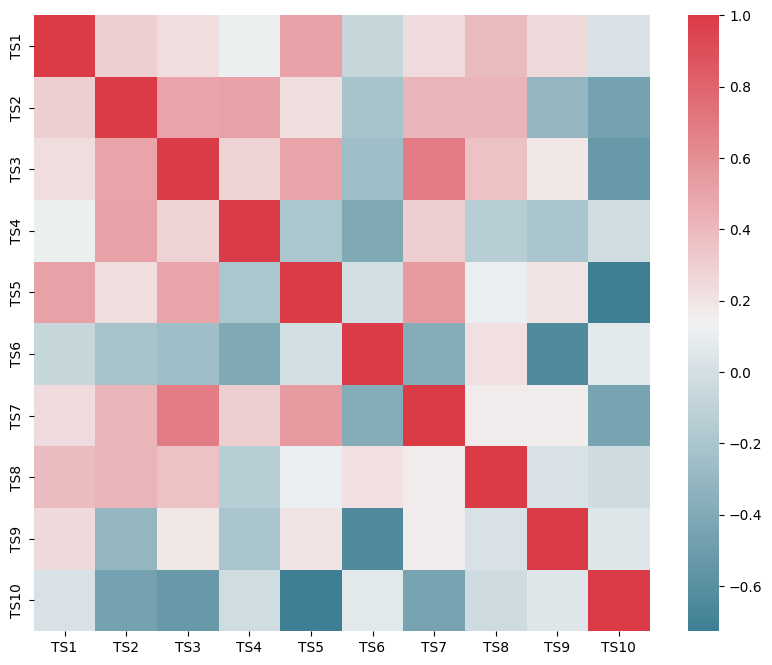

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

The heatmap visualize the correlation matrix of the df DataFrame computed in the previous step (corr=df.corr()), heatmap will have a color scale representing the correlation values, with higher correlation values being represented by darker colors.

In [ ]:
from numpy import linalg as la
w, v=la.eig(corr)

In [ ]:
w

array([ 3.48779692e+00,  1.67549173e+00,  1.75268808e+00,  1.31896821e+00,
        7.82844767e-01,  5.20226971e-01,  3.15337724e-01,  1.44652366e-01,
       -2.41338332e-16,  1.99323709e-03])

In [ ]:
#calculate the distribution of the corr values
cor_ar=corr.to_numpy()
cor_elem=cor_ar[np.triu_indices(cor_ar.shape[0],k=0)]

In [ ]:
cor_elem

array([ 1.        ,  0.29926039,  0.22921732,  0.11415464,  0.51716114,
       -0.07237249,  0.23915966,  0.38710765,  0.24926538,  0.02029056,
        1.        ,  0.5072931 ,  0.51061905,  0.23330916, -0.22548779,
        0.41744554,  0.42175318, -0.31174103, -0.46159413,  1.        ,
        0.2794005 ,  0.50228516, -0.25358891,  0.68330915,  0.36092931,
        0.18467053, -0.53079671,  1.        , -0.19665622, -0.40439344,
        0.30059727, -0.1340914 , -0.20300827, -0.01997055,  1.        ,
       -0.00809829,  0.55334343,  0.10519677,  0.20981758, -0.72675236,
        1.        , -0.37828496,  0.21797239, -0.64259628,  0.06875285,
        1.        ,  0.16708216,  0.15696793, -0.4437612 ,  1.        ,
        0.02179986, -0.03042179,  1.        ,  0.04524969,  1.        ])

The la.eig(corr) function calculates the eigenvalues and eigenvectors of the correlation matrix corr, the eigenvalues w represent the variance explained by each principal component.

The result is array containing the upper triangle elements of the correlation matrix, and it is useful for calculating the distribution of correlation values and identifying potential outliers or extreme correlations.

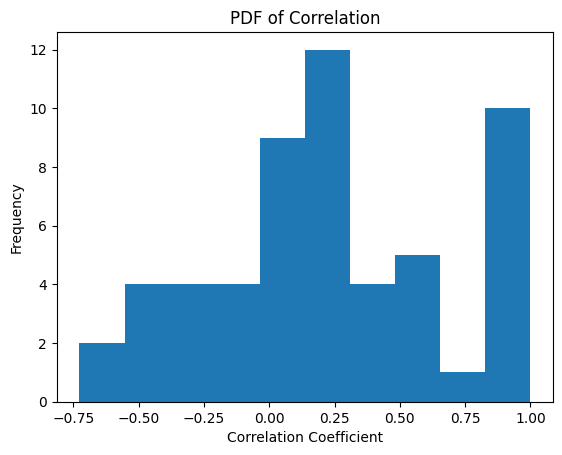

In [ ]:
plt.hist(cor_elem)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('PDF of Correlation')
plt.show()

The histogram show that the majority of the correlation values are close to zero, indicating a weak or no correlation between the variables, and this is expected as the dataset was generated randomly with no specific relationship between the variables, there are a few correlation values that are greater than 0.5 and less than one, indicating a weak positive correlation between the variables, and there few correlation values less than zero indicate there are small number of variables that has negative corellation, also there is no ngative corellation less than 0.75 which means there is no strong and perfect negative correlation between variables.

<ipython-input-80-7415f700ed19>:5: RuntimeWarning: invalid value encountered in sqrt
  b = sigma * np.sqrt((1 + q)**2 - x**2)


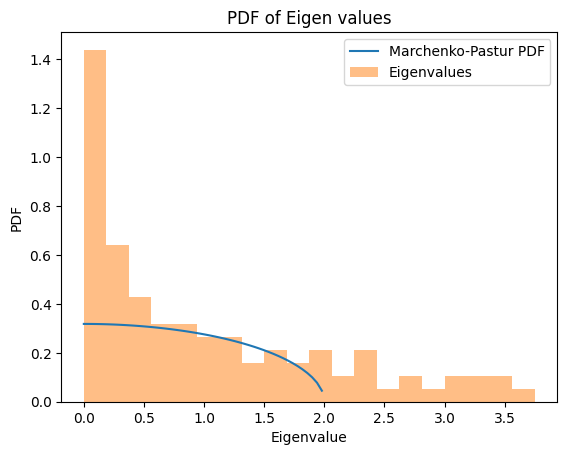

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def marchenko_pastur_pdf(x, sigma=1, q=1):
    b = sigma * np.sqrt((1 + q)**2 - x**2)
    return 1 / (2 * np.pi * q * sigma**2) * b

def correlation_matrix_pdf(corr_matrix):
    eigenvals, _ = np.linalg.eig(corr_matrix)
    q = corr_matrix.shape[0] / corr_matrix.shape[1]
    sigma = 1 / np.sqrt(q)
    x = np.linspace((1 - sigma)**2, (1 + sigma)**2, 100)
    y = marchenko_pastur_pdf(x, sigma=sigma, q=q)
    plt.plot(x, y, label='Marchenko-Pastur PDF')
    plt.hist(eigenvals, density=True, bins=20, alpha=0.5, label='Eigenvalues')
    plt.xlabel('Eigenvalue')
    plt.ylabel('PDF')
    plt.title('PDF of Eigen values')
    plt.legend()
    plt.show()

#Example usage
np.random.seed(2019)
N = 100
cov = np.random.rand(N, N)
corr_matrix = np.corrcoef(cov)
correlation_matrix_pdf(corr_matrix)


The histogram shows the probability density function (PDF) of the eigenvalues of the correlation matrix, the Marchenko-Pastur distribution is a probability density function that characterizes the distribution of the eigenvalues of a large dimensional random matrix. The result is centered around 1, which is expected for a correlation matrix since the diagonal elements are always equal to 1,there is presence of some larger eigenvalues.

# **2 - Kinetic exchange model:**

The kinetic exchange model is a simple model of wealth distribution that assumes a fixed amount of wealth that is randomly distributed among a fixed number of individuals. The model considers a sequence of transactions between individuals, where at each transaction, two individuals are chosen at random, and a random amount of wealth is exchanged between them. The model assumes that the amount of wealth exchanged between two individuals is proportional to the difference in their wealth,and the proportionality constant is denoted by alpha.

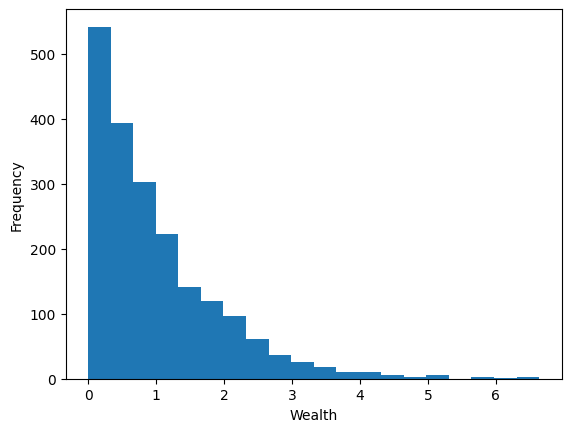

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

N = 200  #No of individuals
T = 1000 #No. of time steps
E = 10 #No. of ensembles
#An ensemble in the context of the kinetic exchange model refers to a single run of the simulation, starting from a specific initial condition
MVec = []
for i in range(E):
    Money = np.ones(N)
    for j in range(T):
        v = np.random.randint(0,N)
        w = np.random.randint(0,N)
        if v != w:
            epsilon = np.random.uniform(0,1)
            WTotal = Money[v] + Money[w]
            Money[v] = epsilon*WTotal
            Money[w] = (1-epsilon)*WTotal
    MVec.append(Money.T)

Mvec = np.array(MVec)
MFinal = np.reshape(Mvec, (E*N,1))
MFinal
plt.hist(MFinal, bins=20)
plt.xlabel('Wealth')
plt.ylabel('Frequency')
plt.show()


The histogram  shows the distribution of wealth across the population after running the kinetic exchange model for 1000 time steps and 10 ensembles, the x-axis represents the wealth of each individual, and the y-axis represents the frequency with which each wealth value occurs.
Based on the histogram, we can see that the distribution of wealth is highly skewed, with a small number of individuals having a large amount of wealth and the majority of individuals having a relatively low amount of wealth. This is consistent with what we might expect in a real-world economy, where wealth tends to be concentrated in the hands of a few individuals or groups.

* The frequency  represents the number of individuals in the population who have that amount of wealth, is calculated by counting the number of occurrences of each wealth value in the simulation output, which is a list of wealth values for each individual at the end of the simulation.




# **yard_sale_model**

economic system that describes the exchange of goods among people in a fixed population.

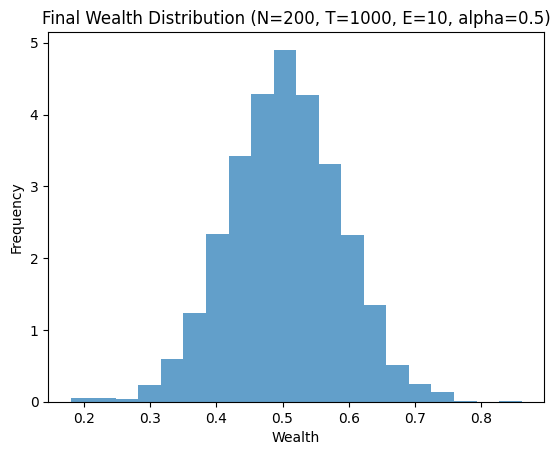

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

def yard_sale_model(N, T, E, alpha):
    """
    Runs the yard sale model for a population of N individuals over T time steps for E ensembles.

    Parameters:
    N (int): number of individuals
    T (int): number of time steps
    E (int): number of ensembles
    alpha (float): parameter controlling the degree of wealth redistribution

    Returns:
    MFinal (numpy array): final wealth distribution across all ensembles
    """

    # Initialize the list to store the wealth values for each individual in each ensemble
    MVec = []

    # Run the model for E ensembles
    for i in range(E):
        # Initialize the wealth vector with random values between 0 and 1
        Money = np.random.uniform(0, 1, size=N)
        # Iterate over T time steps
        for j in range(T):
            # Choose two individuals at random
            v = np.random.randint(0, N)
            w = np.random.randint(0, N)
            # If the individuals are different and have different wealth, perform the yard sale
            if v != w and Money[v] != Money[w]:
                # Calculate the wealth difference and redistribution factor
                dW = abs(Money[v] - Money[w])
                epsilon = min(alpha * dW, 1)
                # Redistribute the wealth according to the yard sale rule
                if Money[v] < Money[w]:
                    Money[v] += epsilon * dW
                    Money[w] -= epsilon * dW
                else:
                    Money[v] -= epsilon * dW
                    Money[w] += epsilon * dW
        # Add the final wealth values to the list
        MVec.append(Money)

    # Convert the list to a numpy array
    MVec = np.array(MVec)
    # Reshape the array into a column vector
    MFinal = MVec.reshape(E*N, 1)

    return MFinal
    # Set the parameters for the simulation
N = 200    # number of individuals
T = 1000   # number of time steps
E = 10   # number of ensembles
alpha = 0.5 # parameter controlling the degree of wealth redistribution

# Run the yard sale model
MFinal = yard_sale_model(N, T, E, alpha)

# Plot the final wealth distribution
plt.hist(MFinal, bins=20, density=True, alpha=0.7)
plt.xlabel('Wealth')
plt.ylabel('Frequency')
plt.title('Final Wealth Distribution (N={}, T={}, E={}, alpha={})'.format(N, T, E, alpha))
plt.show()


The histogram  shows the final wealth distribution of a population of individuals after running the yard sale model for a specified number of time steps and ensembles, the shape of the histogram can provide insights into the degree of wealth inequality in the population.
In the yard sale model, the shape of the histogram will depend on the degree of wealth redistribution parameter (alpha) used in the simulation, a smaller alpha value will lead to a more unequal distribution of wealth, while a larger alpha value will lead to a more equal distribution of wealth.

# **Dragulescu-Yakovenko (DY) model**

is another variation of the kinetic exchange model that includes a savings factor.

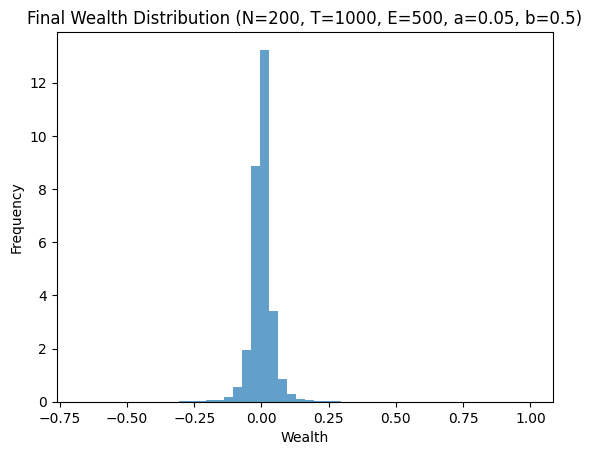

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dy_model(N, T, E, a, b):
    """
    Simulate the Dragulescu-Yakovenko (DY) model of wealth distribution.

    Parameters:
        N (int): Number of individuals in the population.
        T (int): Number of time steps in the simulation.
        E (int): Number of ensembles to run.
        a (float): Parameter controlling the degree of wealth redistribution.
        b (float): Parameter controlling the degree of savings.

    Returns:
        MFinal (ndarray): Final wealth distribution across all ensembles.
    """
    MVec = []
    for i in range(E):
        Money = np.ones(N)
        for j in range(T):
            v = np.random.randint(N)
            w = np.random.randint(N)
            if v != w:
                delta_m = a * (Money[w] - Money[v])
                delta_s = b * (Money[w] + Money[v])
                Money[v] += delta_m - delta_s
                Money[w] -= delta_m + delta_s
        MVec.append(Money.T)
    MVec = np.array(MVec)
    MFinal = np.reshape(MVec, (E*N,1))
    return MFinal
    # Set the parameters for the simulation
N = 200    # number of individuals
T = 1000   # number of time steps
E = 500   # number of ensembles
a = 0.05   # parameter controlling the degree of wealth redistribution
b = 0.5    # parameter controlling the degree of savings

# Run the DY model
MFinal = dy_model(N, T, E, a, b)

# Plot the final wealth distribution
plt.hist(MFinal, bins=50, density=True, alpha=0.7)
plt.xlabel('Wealth')
plt.ylabel('Frequency')
plt.title('Final Wealth Distribution (N={}, T={}, E={}, a={}, b={})'.format(N, T, E, a, b))
plt.show()



The  histogram showing the final wealth distribution using the Dragulescu-Yakovenko (DY) model. The model is parameterized by two parameters: a, which controls the degree of wealth redistribution, and b, which controls the degree of savings.
The parameter (a) controls the degree of wealth redistribution, it determines the amount of money transferred from the richer individual to the poorer one in each transaction, when (a) is set to a small value, the model produces a more unequal distribution of wealth, with a few individuals owning most of the wealth,  When (a) is set to a larger value, wealth becomes more evenly distributed, with fewer individuals owning most of the wealth.

The parameter (b) controls the degree of savings, it determines the fraction of wealth that individuals save after each transaction, When b is set to a small value, individuals tend to spend most of their wealth, leading to a more equal distribution of wealth, When (b) is set to a larger value, individuals tend to save more of their wealth, leading to a more unequal distribution of wealth.

 The shape of the histogram gives an indication of the inequality of the wealth distribution, a symmetrical distribution around the mean indicates a more equal distribution, while a skewed distribution with a long tail indicates a more unequal distribution.



# **Chatterjee-Chakrabarti-Manna (CCM) model:**

model is another variation of the kinetic exchange model that includes a threshold parameter

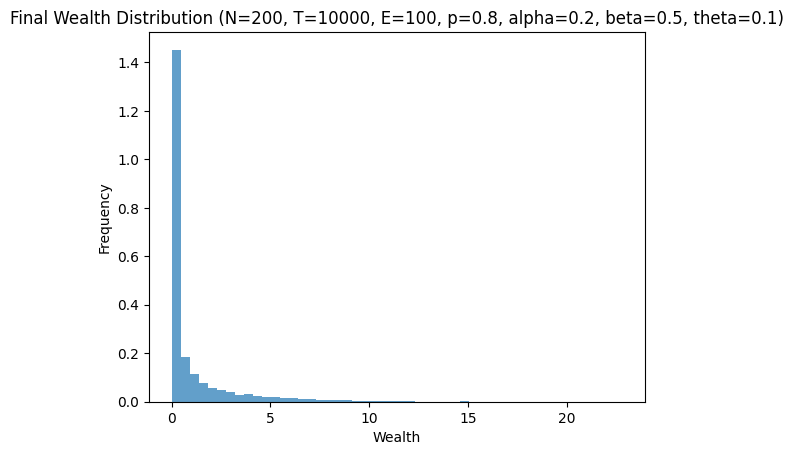

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ccm_model(N, T, E, p, alpha, beta, theta):
    """
    Simulate the Chatterjee-Chakrabarti-Manna (CCM) model of wealth distribution.

    Parameters:
        N (int): Number of individuals in the population.
        T (int): Number of time steps in the simulation.
        E (int): Number of ensembles to run.
        p (float): Probability of a transaction between two individuals.
        alpha (float): Saving propensity parameter.
        beta (float): Redistribution propensity parameter.
        theta (float): Threshold value for redistribution.

    Returns:
        MFinal (ndarray): Final wealth distribution across all ensembles.
    """
    MVec = []
    for i in range(E):
        Money = np.ones(N)
        for j in range(T):
            v = np.random.randint(N)
            w = np.random.randint(N)
            if v != w:
                r = np.random.uniform()
                if r < p:
                    delta_m = alpha * min(Money[v], Money[w])
                    Money[v] -= delta_m
                    Money[w] += delta_m
                else:
                    delta_m = beta * min(Money[v], Money[w])
                    if delta_m > theta:
                        Money[v] -= delta_m
                        Money[w] += delta_m
        MVec.append(Money.T)
    MVec = np.array(MVec)
    MFinal = np.reshape(MVec, (E*N,1))
    return MFinal

# Set the parameters for the simulation
N = 200     # number of individuals
T = 10000   # number of time steps
E = 100    # number of ensembles
p = 0.8     # probability of a transaction between two individuals
alpha = 0.2 # saving propensity parameter
beta = 0.5  # redistribution propensity parameter
theta = 0.1 # threshold value for redistribution

# Run the CCM model
MFinal = ccm_model(N, T, E, p, alpha, beta, theta)

# Plot the final wealth distribution
plt.hist(MFinal, bins=50, density=True, alpha=0.7)
plt.xlabel('Wealth')
plt.ylabel('Frequency')
plt.title('Final Wealth Distribution (N={}, T={}, E={}, p={}, alpha={}, beta={}, theta={})'.format(N, T, E, p, alpha, beta, theta))
plt.show()


The histogram shows that the wealth distribution is heavily skewed to the right, with a large proportion of individuals having low wealth and a small proportion of individuals having high wealth. This suggests that the redistribution mechanism of the CCM model is not very effective at reducing wealth inequality.
the histogram provides insight into the distribution of wealth in the simulated population and how it is affected by the CCM model parameters.

# **referrences:**

1 - "Statistical mechanics of money, wealth, and income" by A. Chakraborti and B.K. Chakrabarti (2000).

2 - Econophysics and Sociophysics: Trends and Perspectives" edited by B.K. Chakrabarti, A. Chakraborti, and A. Chatterjee (2006).

3 - Dragulescu, A., & Yakovenko, V. M. (2000). Statistical mechanics of money. The European Physical Journal B-Condensed Matter and Complex Systems, 17(4), 723-729.

4 - Chatterjee, A., Chakrabarti, B. K., & Manna, S. S. (2004). Pareto law in a kinetic model of market with random saving propensity. Physica A: Statistical Mechanics and its Applications, 335(1-2), 155-163.

5 - Marchenko, V.A. and Pastur, L.A., "Distribution of eigenvalues for some sets of random matrices," Mathematics of the USSR-Sbornik, Vol. 1, pp. 457-483, 1967.

6 - Laloux, L., Cizeau, P., Bouchaud, J.-P., & Potters, M. (1999). Random matrix theory and financial correlations. International Journal of Theoretical and Applied Finance, 2(03), 391–397
